# 拉钩网数据分析师岗位项目

## 项目背景

        当前出于找工作的目的，因目前大环境的影响，故对数据分析和大数据开发两个寻找方向进行一个基本了解，主要了解当前的市场招聘需求，薪酬待遇，所需技能等，并通过这个项目回顾所学python基础语法和常用库的了解。

## 项目简介

        本次利用网络爬虫爬取拉勾网数据，通过爬取到的数据分析岗位简介及岗位职责以及所对应的薪酬所需要掌握的知识体系，全方位的了解这个岗位的大致情况和技能图谱。

## 目的

    用数据来解读数据分析师岗位需求
+ 数据分析师岗位需求的地域性分布；
+ 整个群体中薪酬分布的情况；
+ 不同地区的薪酬情况是怎样的；
+ 该岗位对于工作经验的要求是怎样的，薪酬是怎样变化的；
+ 从用人单位的角度看，应当具备哪些技能；


# 数据整理

In [162]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
import jieba.analyse
from wordcloud import WordCloud
import random
from collections import Counter
#首先引入所有需要应用到的库

   #由于matplotlib默认字体不是中文字体，在进行中文显示的时候只有一个框框，因此必须显式的指定字体文件
import matplotlib as mpl

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#读取爬取到的数据
data = pd.read_excel('C:/Users/杨佳伟/lagou_dataanalysis-master/Data_Lagou.xlsx')
#清理数据，将类别独立出来，并提取所在行政区，删除抓取到的公司名称空白数据
data['所在行政区'] = data['工作地址'].str.extract('((?<=-)[^-]+(?=-))',expand = True)
data['领域'] = data['类别'].str.split('/',expand = True)[0]
data['融资阶段'] = data['类别'].str.split('/',expand = True)[1]
data['公司规模'] = data['类别'].str.split('/',expand = True)[2]
data['职位描述'] = data['职位描述'].str.replace('\n',' ')
data.dropna(subset = ['招聘公司'],inplace = True)

#删除不需要的列
data.drop(['类别'],axis = 1,inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 786
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   搜索岗位    675 non-null    object
 1   招聘岗位    675 non-null    object
 2   工作地点    675 non-null    object
 3   发布时间    675 non-null    object
 4   经验      675 non-null    object
 5   学历      675 non-null    object
 6   薪资范围    675 non-null    object
 7   招聘公司    675 non-null    object
 8   职位诱惑    668 non-null    object
 9   职位描述    668 non-null    object
 10  工作地址    646 non-null    object
 11  所在行政区   646 non-null    object
 12  领域      653 non-null    object
 13  融资阶段    653 non-null    object
 14  公司规模    653 non-null    object
dtypes: object(15)
memory usage: 84.4+ KB


In [163]:
#后续处理中发现行政区中带有前后空格，均需处理
data['所在行政区'].unique()
data['所在行政区'] = data['所在行政区'].str.strip()
data['所在行政区'].where(data['所在行政区']!='龙华区','龙华新区',inplace = True)
data['所在行政区'].unique()

array(['福田区', '南山区', '罗湖区', '龙岗区', '龙华新区', '宝安区', nan], dtype=object)

In [164]:
#清理重复行
clean_data = data.drop_duplicates([u'招聘公司',u'薪资范围',u'招聘岗位',u'职位描述'])
clean_data.info()

#写入清理过后的数据
#clean_data.to_excel('C:/Users/杨佳伟/lagou_dataanalysis-master/Data_Lagou_clean.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 786
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   搜索岗位    536 non-null    object
 1   招聘岗位    536 non-null    object
 2   工作地点    536 non-null    object
 3   发布时间    536 non-null    object
 4   经验      536 non-null    object
 5   学历      536 non-null    object
 6   薪资范围    536 non-null    object
 7   招聘公司    536 non-null    object
 8   职位诱惑    529 non-null    object
 9   职位描述    529 non-null    object
 10  工作地址    510 non-null    object
 11  所在行政区   510 non-null    object
 12  领域      517 non-null    object
 13  融资阶段    517 non-null    object
 14  公司规模    517 non-null    object
dtypes: object(15)
memory usage: 67.0+ KB


### 地域分布情况

In [165]:
count_by_city = clean_data.groupby(['所在行政区','搜索岗位'])['所在行政区'].count()
count_by_city


所在行政区  搜索岗位
南山区    BI       86
       etl      34
       数据分析    111
       数据开发     88
宝安区    BI        6
       etl       2
       数据分析     15
       数据开发      1
福田区    BI       24
       etl      10
       数据分析     31
       数据开发     55
罗湖区    BI        4
       etl       2
       数据分析      6
       数据开发      6
龙华新区   BI        2
       数据分析      3
       数据开发      2
龙岗区    BI        9
       etl       2
       数据分析      5
       数据开发      6
Name: 所在行政区, dtype: int64

<AxesSubplot:xlabel='所在行政区'>

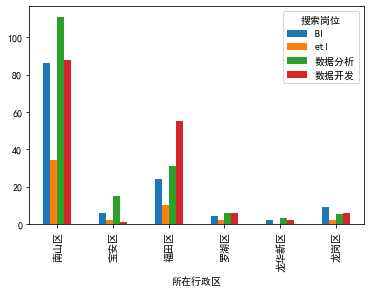

In [166]:
count_by_city.unstack().plot(kind = 'bar')

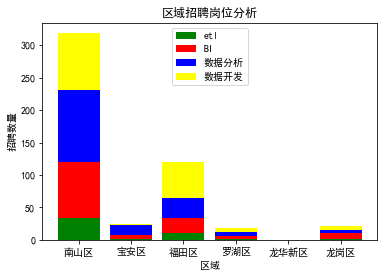

In [167]:
count_by_cityun = count_by_city.unstack()
plt.bar(count_by_cityun.index,count_by_cityun.loc[:,'etl'],color = 'green',label = 'etl')
plt.bar(count_by_cityun.index,count_by_cityun.loc[:,'BI'],bottom = count_by_cityun.loc[:,'etl'],color = 'red',label = 'BI')
plt.bar(count_by_cityun.index,count_by_cityun.loc[:,'数据分析'],bottom = count_by_cityun.loc[:,'BI']
        +count_by_cityun.loc[:,'etl'],color = 'blue',label = '数据分析' )
plt.bar(count_by_cityun.index,count_by_cityun.loc[:,'数据开发'],bottom = count_by_cityun.loc[:,'BI']
        +count_by_cityun.loc[:,'etl']+count_by_cityun.loc[:,'数据分析'],color = 'yellow',label = '数据开发' )

plt.xlabel('区域')
plt.ylabel('招聘数量')
plt.title('区域招聘岗位分析')
plt.legend(loc='best')

        区域经统计，拉勾网上爬取到深圳企业有数据类型的人才需求是比较旺盛的，其中南山作为科技创新产业集中区，需求量第一且远超其他区域，需求数量接近总数的百分之六十。

### 学历要求

<AxesSubplot:xlabel='学历'>

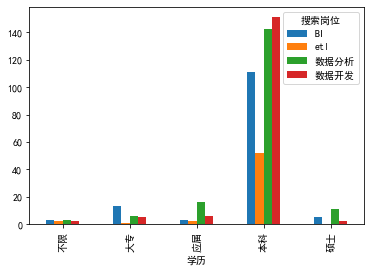

In [168]:
count_by_edu = clean_data.groupby([u'学历',u'搜索岗位'])[u'搜索岗位'].count().sort_values(ascending = False)
count_by_edu
count_by_edu.unstack().plot(kind = 'bar')

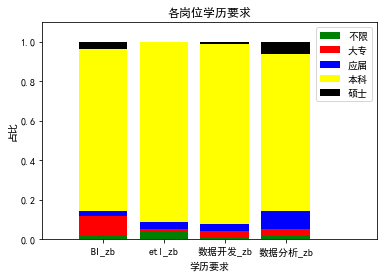

In [169]:

count_by_eduun = count_by_edu.unstack()
count_by_eduun_union = pd.merge(count_by_eduun,count_by_eduun/count_by_eduun.sum(),
                                left_index=True,right_index=True,suffixes=['','_zb'])
count_by_eduun_union
plt.bar(['BI_zb','etl_zb','数据开发_zb','数据分析_zb'],
        count_by_eduun_union.loc['不限',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],
        color = 'green',label = '不限')
plt.bar(['BI_zb','etl_zb','数据开发_zb','数据分析_zb'],count_by_eduun_union.loc['大专',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],
        bottom = count_by_eduun_union.loc['不限',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],color = 'red',label = '大专')
plt.bar(['BI_zb','etl_zb','数据开发_zb','数据分析_zb'],count_by_eduun_union.loc['应届',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],
        bottom = count_by_eduun_union.loc['大专',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']]+
        count_by_eduun_union.loc['不限',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],color = 'blue',label = '应届')
plt.bar(['BI_zb','etl_zb','数据开发_zb','数据分析_zb'],count_by_eduun_union.loc['本科',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],
        bottom = count_by_eduun_union.loc['大专',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']]+
        count_by_eduun_union.loc['不限',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']]
        +count_by_eduun_union.loc['应届',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],color = 'yellow',label = '本科')
plt.bar(['BI_zb','etl_zb','数据开发_zb','数据分析_zb'],count_by_eduun_union.loc['硕士',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],
        bottom = count_by_eduun_union.loc['大专',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']]+
        count_by_eduun_union.loc['不限',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']]
        +count_by_eduun_union.loc['应届',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']]
        +count_by_eduun_union.loc['本科',['BI_zb','etl_zb','数据开发_zb','数据分析_zb']],color = 'black',label = '硕士')
plt.ylim(0,1.1)
plt.xlim(-1,4.5)
plt.xlabel('学历要求')
plt.ylabel('占比')
plt.title('各岗位学历要求')
plt.legend(loc='best')

        从上面两个图中可以看出，基本均只需要本科即可胜任岗位需求，其中数据分析要求稍高，硕士占比相较其他岗位要高。

### 总体薪酬情况

C:\Users\杨佳伟\AppData\Local\Temp/ipykernel_21924/375282122.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[u'平均薪资'] = clean_data[u'薪资范围'].apply(avg_salary)
No handles with labels found to put in legend.


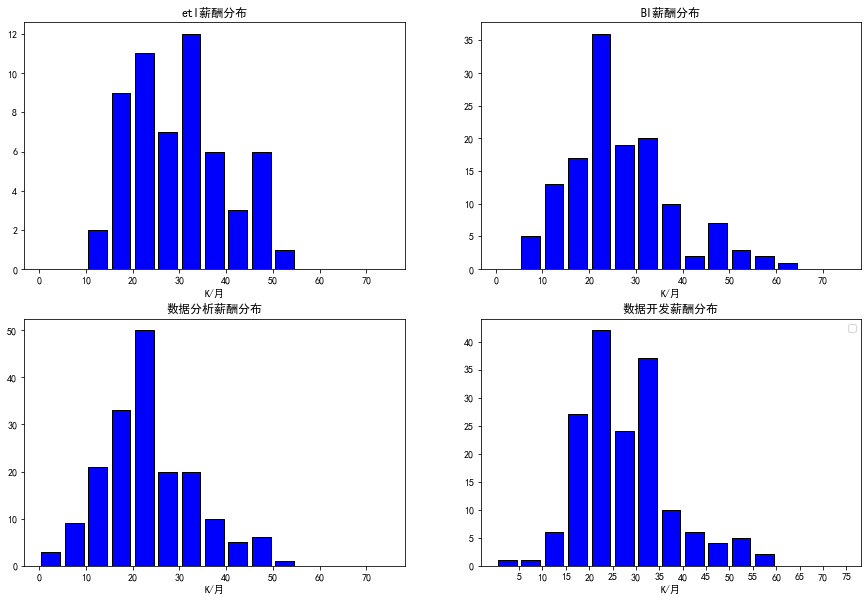

In [201]:
 #因薪资为区间取值，因此将此数据进行清理，取区间的均值作为薪酬值
def avg_salary(salary):
    #该函数传入一个薪酬区间字符串，并将其转换成区间均值并返回
    s_list = salary.split('-')
    s_min = int(s_list[0][:-1])
    s_max = int(s_list[1][:-1])
    s_avg = float(s_min + s_max)/2
    return s_avg

clean_data[u'平均薪资'] = clean_data[u'薪资范围'].apply(avg_salary)
clean_data[u'平均薪资']

fig = plt.figure(figsize =  (15,10))
ax1 = fig.add_subplot(221)
rect = ax1.hist(clean_data.loc[clean_data['搜索岗位']=='etl' ,u'平均薪资'],range = (0,75), rwidth=0.8,color='b',edgecolor = 'k',bins = 15,histtype='bar')
ax1.set_title(u'etl薪酬分布')
ax1.set_xlabel(u'K/月')
ax2 = fig.add_subplot(222)
rect = ax2.hist(clean_data.loc[clean_data['搜索岗位']=='BI' ,u'平均薪资'],range = (0,75),  rwidth=0.8,color='b',edgecolor = 'k',bins = 15,histtype='bar')
ax2.set_title(u'BI薪酬分布')
ax2.set_xlabel(u'K/月')
ax3 = fig.add_subplot(223)
rect = ax3.hist(clean_data.loc[clean_data['搜索岗位']=='数据分析' ,u'平均薪资'], range = (0,75), rwidth=0.8,color='b',edgecolor = 'k',bins = 15,histtype='bar')
ax3.set_title(u'数据分析薪酬分布')
ax3.set_xlabel(u'K/月')
ax4 = fig.add_subplot(224)
rect = ax4.hist(clean_data.loc[(clean_data['搜索岗位']=='数据开发')& (clean_data['平均薪资']<60),u'平均薪资'],range = (0,75), rwidth=0.8,color='b',edgecolor = 'k',bins = 15,histtype='bar')
ax4.set_title(u'数据开发薪酬分布')
ax4.set_xlabel(u'K/月')
plt.xticks(range(5,80,5))
plt.legend()

    可以看出做数据分析起薪较低，且上限相对局限，主要薪酬分布在15-35K之间，etl的薪酬相对起薪较高，且中间段薪酬分布较为平均，但是上限相对BI和数据开发较低，总的来说薪酬待遇方面，etl是相对可观且平均。其他三个岗位主要集中

### 不同城市的薪酬分布

C:\Users\杨佳伟\AppData\Local\Temp/ipykernel_21924/4045979955.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[u'最小薪资'] = clean_data[u'薪资范围'].apply(min_salary)
C:\Users\杨佳伟\AppData\Local\Temp/ipykernel_21924/4045979955.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[u'最大薪资'] = clean_data[u'薪资范围'].apply(max_salary)


Text(0.5, 1.0, '薪资上限分布情况')

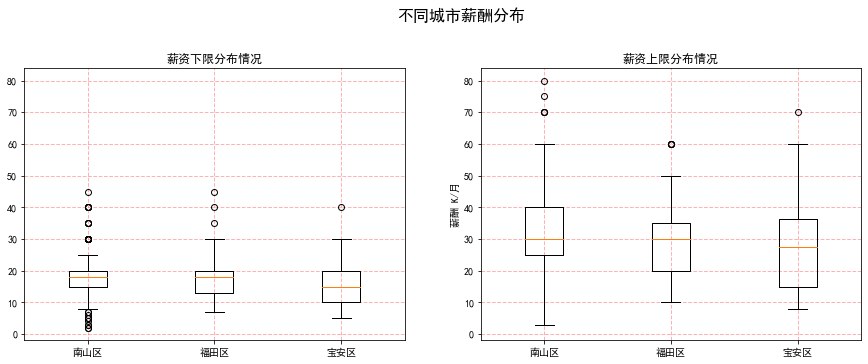

In [214]:
#观察各区域的薪酬分布箱线图
def min_salary(salary):
    #该函数传入一个薪酬区间字符串，并将较小值返回
    s_list = salary.split('-')
    s_min = int(s_list[0][:-1])
    return s_min
def max_salary(salary):
    #该函数传入一个薪酬区间字符串，并将较大值返回
    s_list = salary.split('-')
    s_max = int(s_list[1][:-1])
    return s_max
#观察分城市的薪酬分布箱线
clean_data[u'最小薪资'] = clean_data[u'薪资范围'].apply(min_salary)

clean_data[u'最大薪资'] = clean_data[u'薪资范围'].apply(max_salary)
count_by_city_min_salary = clean_data.groupby([u'所在行政区'])[u'最小薪资']

count_by_city_max_salary = clean_data.groupby([u'所在行政区'])[u'最大薪资']


#取前5个区域的数据
small_data_by_city = clean_data.groupby(['所在行政区'])['所在行政区'].count().sort_values(ascending = False)[0:3]

#将数据分组取出并放入列表
df1 = []
for group in small_data_by_city.index:
    v = count_by_city_min_salary.get_group(group).values
    df1.append(v)
df2 = []
for group in small_data_by_city.index:
    v = count_by_city_max_salary.get_group(group).values
    df2.append(v)


fig = plt.figure(figsize = (15,5))
ax4 = plt.subplot(121)
ax5 = plt.subplot(122,sharey=ax4)
rect = ax4.boxplot(df1)
rect = ax5.boxplot(df2)
ax4.set_xticklabels(small_data_by_city.index)
ax5.set_xticklabels(small_data_by_city.index)
fig.suptitle(u'不同城市薪酬分布',fontsize=16,x=0.53,y=1.05,)
plt.ylabel(u'薪酬 K/月')
ax4.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
ax5.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
ax4.set_title(u'薪资下限分布情况')
ax5.set_title(u'薪资上限分布情况')

        因为后面的区域需求较少，参考价值不高，所以只分析前面3个区域的情况，因薪资都是取值区间，但是一般情况上限很多时候是给人参考，除非是碰到特牛的人，才可能达到，所以中值或者较小值得参考脚趾比较高，上图是将上限值和下限值分别提取出来做比较，综合情况可以看出南山区薪资下线分布和上限分布均要高于其他两个区域。

### 工作经验需求

C:\Users\杨佳伟\AppData\Local\Temp/ipykernel_21924/3586430525.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(count_by_experience.index, rotation=30)


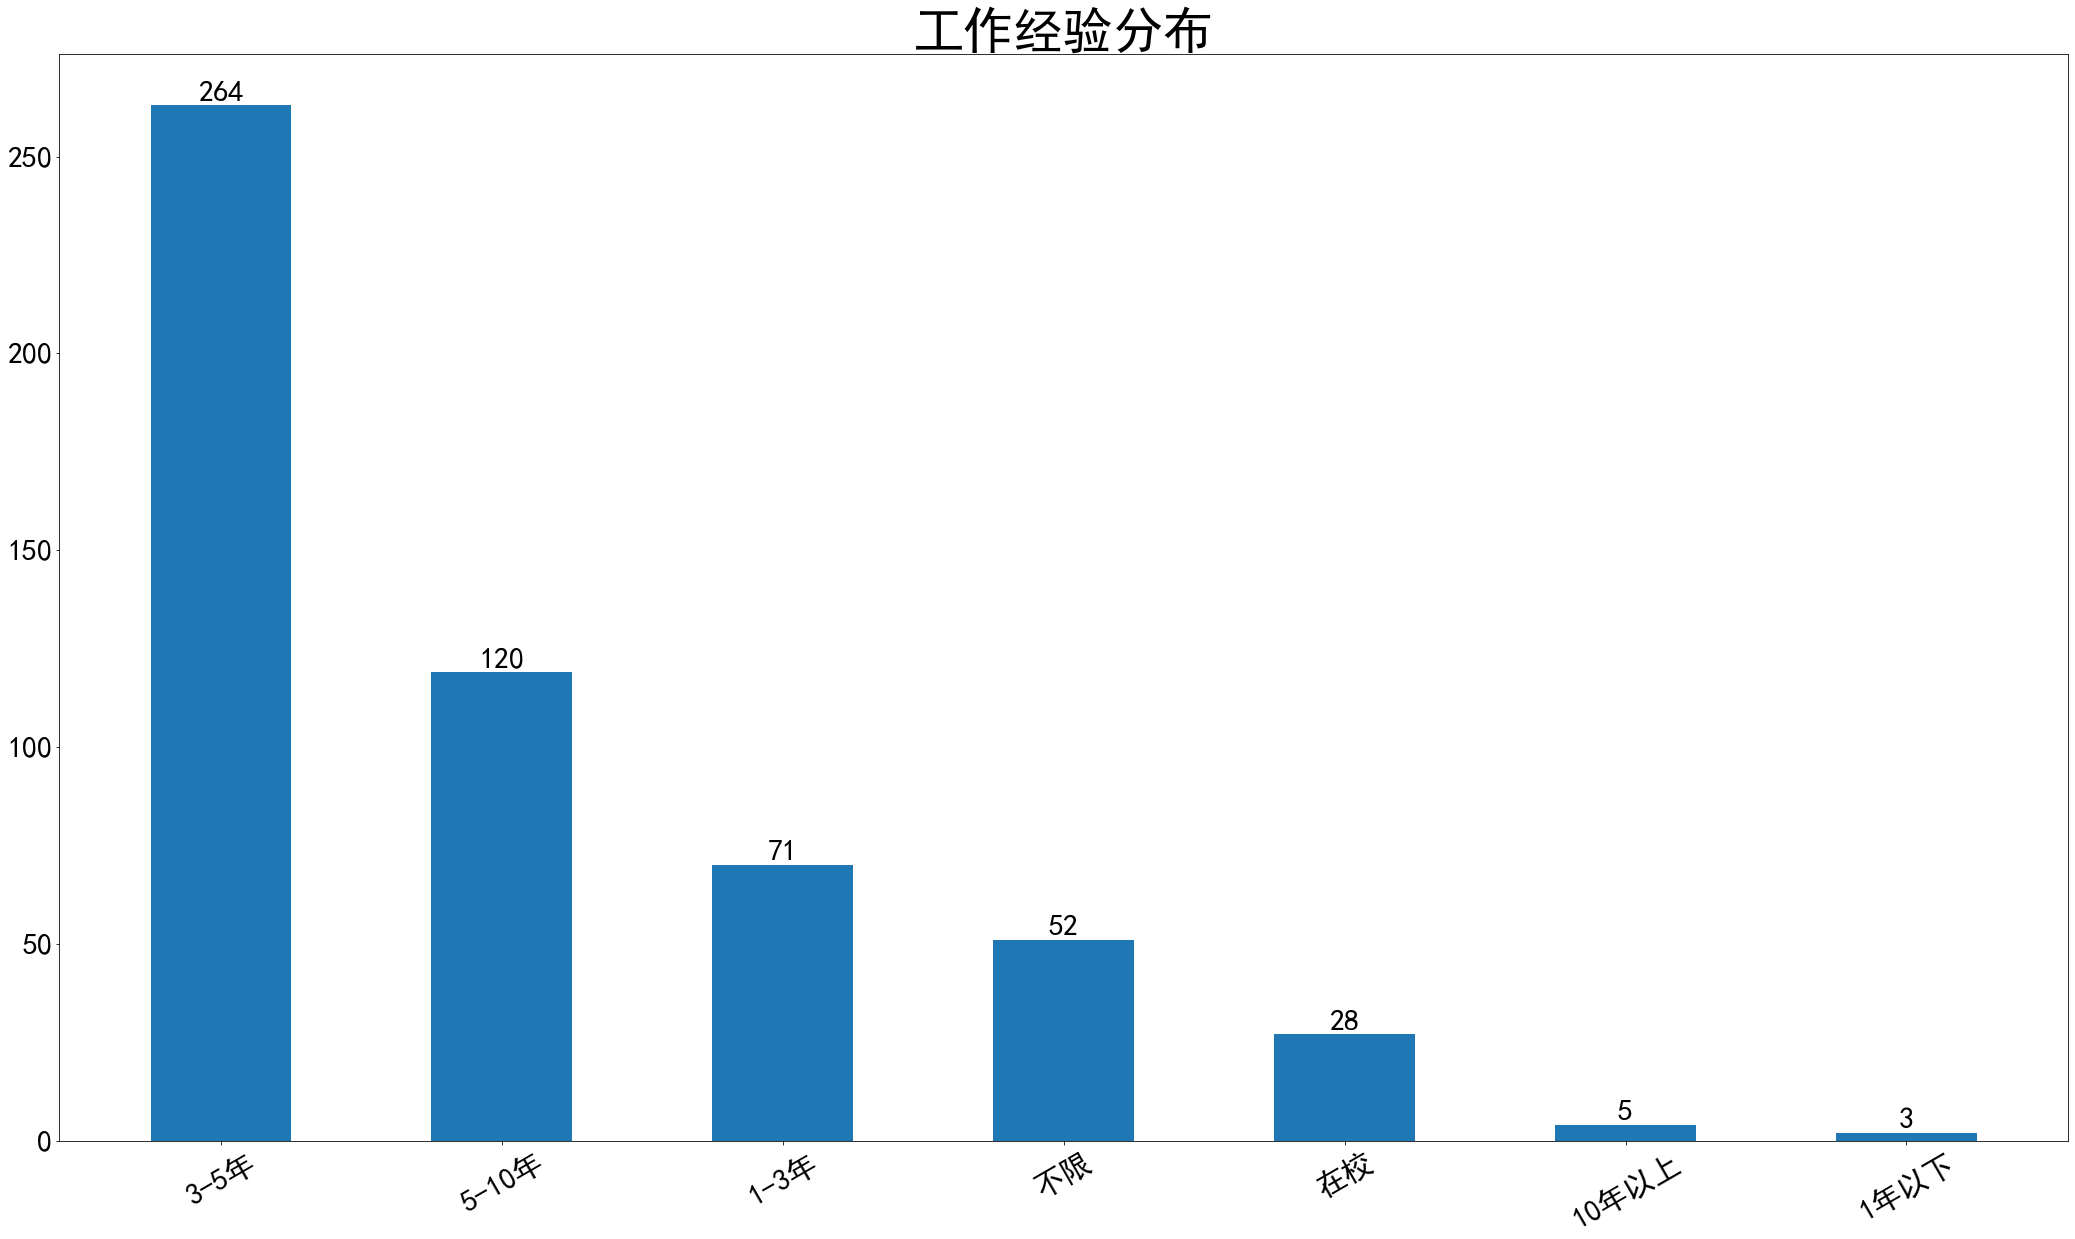

In [215]:
count_by_experience = clean_data.groupby([u'经验'])[u'搜索岗位'].count().sort_values(ascending = False)
count_by_experience
fig = plt.figure(figsize=(36,20))
ax6 = plt.subplot(111)
ax6.set_xticklabels(count_by_experience.index, rotation=30)
plt.tick_params(labelsize=30)
rect = ax6.bar(count_by_experience.index,count_by_experience.values, width = 0.5)
ax6.set_title(u'工作经验分布',fontsize=50)
for a,b in zip(count_by_experience.values,count_by_experience.index):
    ax6.text(str(b), a+0.05,a+1 ,ha='center', va= 'bottom',fontsize=30)  

        可以看出需求量最大的是3-5年，说明先在市场较为成熟，更多的需要较为资深的分析师去探索市场，其次是1-3年，说明市场后期需要的人才也是较多的，也有较多机会，然后是不限，不限和应届还有1年以下的可以归为一类，都是属于无经验或基础入门类，然后5-10年较少，10年以上基本没有需求，也就是说可能会碰到发展瓶颈期，需要在前期快速成长。

### 不同工作经验的薪酬分布

Text(0.5, 1.0, '薪资上限分布情况')

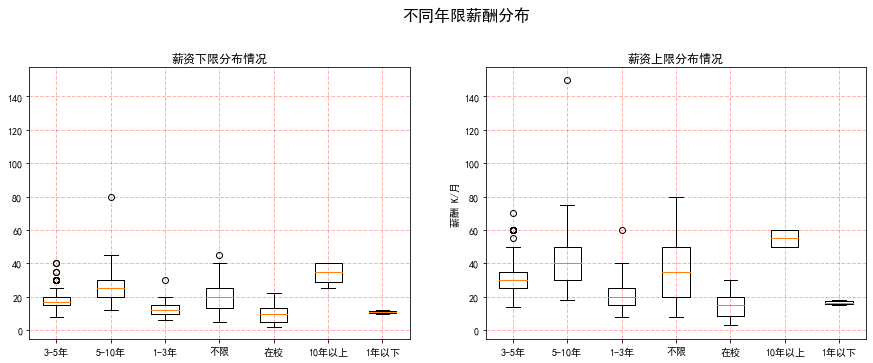

In [217]:

count_by_exp_min_salary = clean_data.groupby([u'经验'])[u'最小薪资']

count_by_exp_max_salary = clean_data.groupby([u'经验'])[u'最大薪资']
count_by_exp_min_salary.mean()

#将经验分组
count_by_exp_min = clean_data.groupby([u'经验'])[u'最小薪资'].count().sort_values(ascending = False)
count_by_exp_max = clean_data.groupby([u'经验'])[u'最大薪资'].count().sort_values(ascending = False)



#将数据分组取出并放入列表
df1 = []
for group in count_by_exp_min.index:
    v = count_by_exp_min_salary.get_group(group).values
    df1.append(v)
df2 = []
for group in count_by_exp_max.index:
    v = count_by_exp_max_salary.get_group(group).values
    df2.append(v)


fig = plt.figure(figsize = (15,5))
ax7 = plt.subplot(121)
ax8 = plt.subplot(122,sharey=ax7)
rect = ax7.boxplot(df1)
rect = ax8.boxplot(df2)
ax7.set_xticklabels(count_by_exp_min.index)
ax8.set_xticklabels(count_by_exp_max.index)
fig.suptitle(u'不同年限薪酬分布',fontsize=16,x=0.53,y=1.05,)
plt.ylabel(u'薪酬 K/月')
ax7.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
ax8.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
ax7.set_title(u'薪资下限分布情况')
ax8.set_title(u'薪资上限分布情况')


        上图可以很明显的看出，基本是随着工作年限的增长收入直线增加的，10年内并不会说停滞或倒退的现象。

### 职业技能关键词

C:\Users\杨佳伟\AppData\Local\Temp/ipykernel_21924/3822307921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['key_words'] = clean_data['职位描述'].apply(key_words)


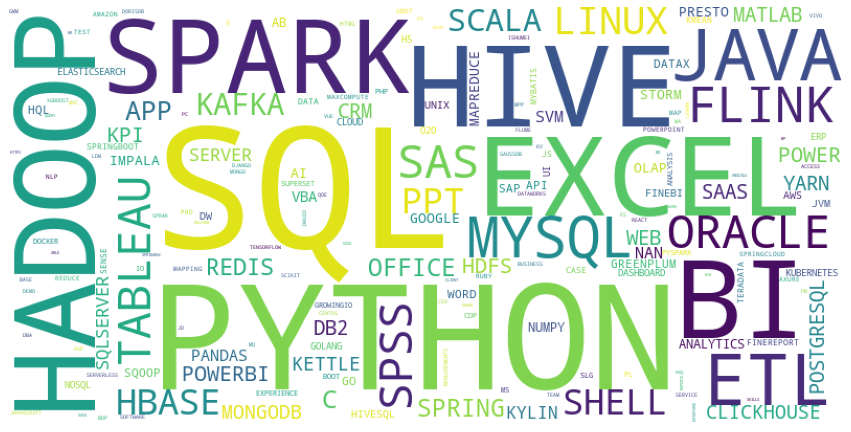

In [225]:
#首先抽取关键词
def key_words(text):
    key_words = jieba.analyse.extract_tags(str(text), topK=20, withWeight=False, allowPOS=())
    return key_words
clean_data['key_words'] = clean_data['职位描述'].apply(key_words)

#启用自定义字典
jieba.load_userdict('C:/Users/杨佳伟/lagou_dataanalysis-master/userdict.txt')

#创建一个文本，将关键词列表全部写入该文本
#因技能类全是英文词语，所以将中文词语全部过滤掉，只填入英文技能分词
def write_to_text(word_list):
    with open('C:/Users/杨佳伟/lagou_dataanalysis-master/word_list_text.txt','a',encoding="utf-8") as f:
        for word in word_list:
            for i in word:
                #ord将字符转化为ASCII编码
                if ord(i) < 256:                    
                    f.writelines((word.upper()+u','))
                    break
            
clean_data['key_words'].apply(write_to_text)

text = open('C:/Users/杨佳伟/lagou_dataanalysis-master/word_list_text.txt','r',encoding="utf-8").read()

#因wordcloud不支持中文显示，如有中文需要显示，请先下载支持中文字体，然后在词云地址中加上地址就行
#font = r'C:\Windows\Fonts\simfang.ttf'
#词云地址font_path=font

#collocations=False，默认为True,会统计搭配词语，导致有部分词语会重复出现
wcd = WordCloud(width = 800, height = 400,background_color = 'white',collocations=False).generate(text)

fig = plt.figure(figsize=(15,8))
#默认词云显示
plt.imshow(wcd)
plt.axis("off")
plt.show()
 

        词云可以很清楚的看出4个岗位的相应技能需求，企业要求的技能出现频率较高的就是PYTHON,SQL,HIVE，因为在工作中SQL属于日常必用，PYTHON也学习了一段时间，HIVE与sql类似，目前相对我而言基本可以满足要求，这3点也基本是数据处理必备技能。

# 结论分析

    通过上面的分析，我们可以得到的结论有这些：
1. 目前这几个岗位除etl岗位外，招聘需求还是可以的，主要集中在南山区。
2. 大多薪酬收入集中在15k-30k每月，但是未来可期。
3. 从待遇上看，南山区是最好的。
4. 数据相关的岗位是个年轻的职业方向，基本上都是要求在5年以下的岗位。
6. 随着经验的提升，对应岗位的薪酬也在不断提高。
7. 数据分析师需求频率排在前列的技能有：**SQL**，Excel, SAS，SPARK, **Python**, Hadoop，Tableau和MySQL等，其中SQL和PYTHON简直可以说是必备技能。 
9. SQL语言和传统的SAS，SPSS两大数据分析软件，能够让你在保证中等收入的条件下，能够适应更多企业的要求，也就意味着更多的工作机会。

# 思考和总结

        本次分析仅仅只涉及到最基础的数据处理及图形展示，在此过程中有参考网上的一些知识，也对一些不熟悉的地方有了更多的了解，虽然初学的过程很艰难，但是随着后期的逐渐使用，会越来越熟练，现在走过的弯路，以后都将会是直路。